# 1- Importing dataset

In [103]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
df = pd.read_csv("/kaggle/input/mycustomers/mycustomers.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670.0,1,2
1,100000002,1,1,22,1,150773.0,1,2
2,100000003,0,0,49,1,89210.0,0,0
3,100000004,0,0,45,1,171565.0,1,1
4,100000005,0,0,53,1,149031.0,1,1


# 2- Detecting outlier for income

### Visualize outlier with box and whisker plot

<Axes: ylabel='Income'>

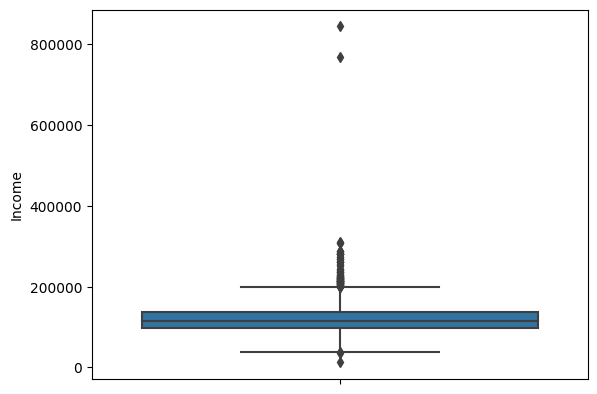

In [104]:
import seaborn as sns
sns.boxplot(data=df , y="Income")

### Detecting Q1 and Q3 and IQR values

In [105]:
df_income = df["Income"]
Q1 =df_income.quantile(0.25)
Q3 = df_income.quantile(0.75)
IQR = Q3-Q1
print(
"""Q1: %d
Q2: %d 
IQR %d """
    % (Q1,Q3,IQR))

Q1: 97613
Q2: 138011 
IQR 40398 


### Detecting lower and upper bound $ (\pm 1\div 2)\times$ IQR

In [106]:
lower_bound = Q1-0.5*IQR
upper_bound = Q3+0.5*IQR
lower_bound,upper_bound

(77414.0, 158210.0)

In [107]:
outlier = ~((df_income <upper_bound) &  (df_income >lower_bound))
outlier

0       False
1       False
2       False
3        True
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999     True
Name: Income, Length: 2000, dtype: bool

In [108]:
df[outlier]

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
3,100000004,0,0,45,1,171565.0,1,1
7,100000008,0,0,35,1,193621.0,2,1
9,100000010,0,1,28,1,174646.0,2,0
18,100000019,1,1,44,2,261952.0,2,2
25,100000026,0,0,36,1,71909.0,0,0
...,...,...,...,...,...,...,...,...
1973,100001974,1,0,24,0,67936.0,0,0
1975,100001976,0,0,42,1,77317.0,0,0
1980,100001981,0,0,25,0,64037.0,0,0
1987,100001988,0,0,25,0,66628.0,0,0


# 3- First look data 

In [109]:
df[df.columns[1:]].corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.243916,-0.181302,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.372949,-0.076487,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654334,0.290260,0.108388,0.119751
Education,0.243916,0.372949,0.654334,1.000000,0.185433,0.066035,0.036004
Income,-0.181302,-0.076487,0.290260,0.185433,1.000000,0.588548,0.416947
Occupation,-0.202491,-0.029490,0.108388,0.066035,0.588548,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.036004,0.416947,0.571795,1.000000


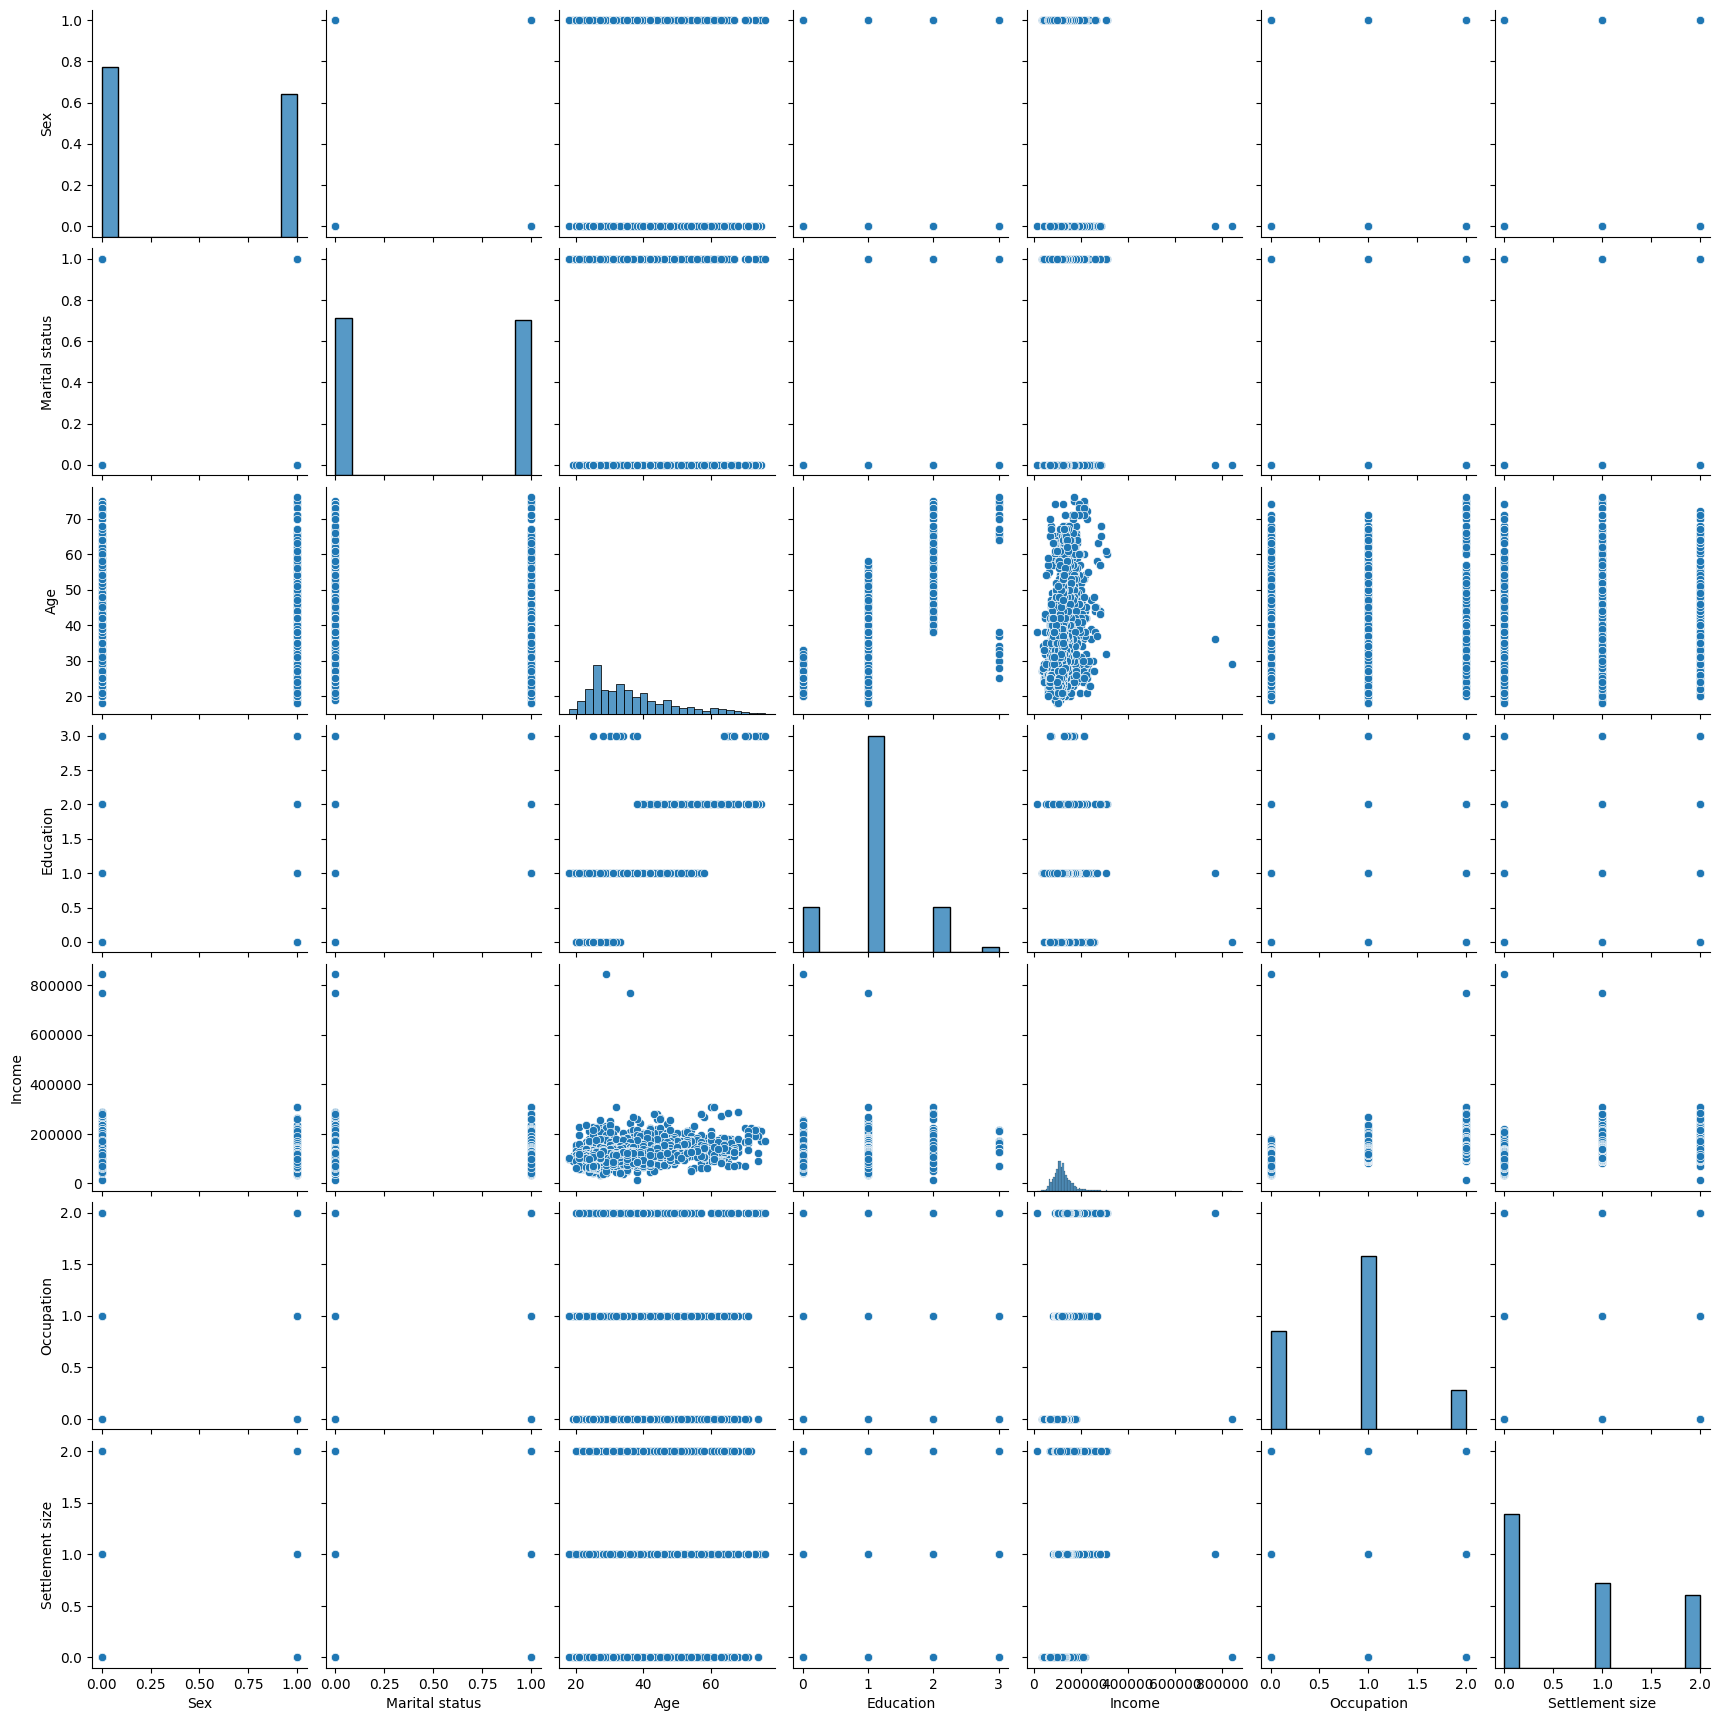

In [110]:
sns.pairplot(df[df.columns[1:]])

In [111]:
df.count()

ID                 2000
Sex                2000
Marital status     2000
Age                2000
Education          2000
Income             1997
Occupation         2000
Settlement size    2000
dtype: int64

## Summery;

### 1- There is no important corelasion
### 2- Three income values are not exist


# 4- Filling NaN values

In [112]:
df_income[outlier]=df_income.mean()

In [113]:
df_income[outlier]

3       121518.114171
7       121518.114171
9       121518.114171
18      121518.114171
25      121518.114171
            ...      
1973    121518.114171
1975    121518.114171
1980    121518.114171
1987    121518.114171
1999    121518.114171
Name: Income, Length: 465, dtype: float64

<Axes: >

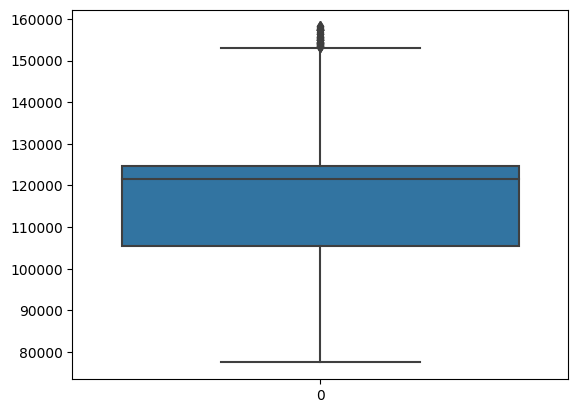

In [114]:
sns.boxplot(df_income)

In [115]:
df.count()

ID                 2000
Sex                2000
Marital status     2000
Age                2000
Education          2000
Income             2000
Occupation         2000
Settlement size    2000
dtype: int64

# 5- Normalization procces
## We use standart scaller because thats better for this station

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard_df = df.copy()
standard_df[standard_df.columns[5]] = pd.DataFrame(scaler.fit_transform(standard_df[[standard_df.columns[5]]]),columns=[standard_df.columns[5]])
standard_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,0.445806,1,2
1,100000002,1,1,22,1,1.939479,1,2
2,100000003,0,0,49,1,-1.583296,0,0
3,100000004,0,0,45,1,0.265448,1,1
4,100000005,0,0,53,1,1.839797,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,0.380286,0,0
1996,100001997,1,1,27,1,0.049484,1,0
1997,100001998,0,0,31,0,-1.744090,0,0
1998,100001999,1,1,24,1,-1.082143,0,0


In [117]:
standard_df[standard_df.columns[3]] = pd.DataFrame(scaler.fit_transform(standard_df[[standard_df.columns[3]]]),columns=[standard_df.columns[3]])
standard_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,2.653614,2,0.445806,1,2
1,100000002,1,1,-1.187132,1,1.939479,1,2
2,100000003,0,0,1.117316,1,-1.583296,0,0
3,100000004,0,0,0.775916,1,0.265448,1,1
4,100000005,0,0,1.458716,1,1.839797,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,0.946616,1,0.380286,0,0
1996,100001997,1,1,-0.760382,1,0.049484,1,0
1997,100001998,0,0,-0.418983,0,-1.744090,0,0
1998,100001999,1,1,-1.016432,1,-1.082143,0,0


# 6- K-means Clustring

### Elbow method 

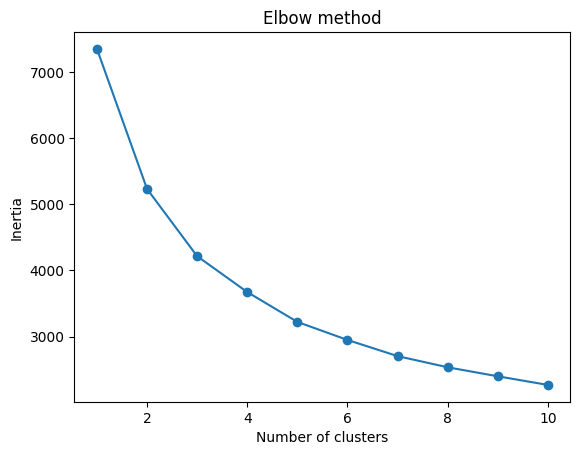

In [118]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
inertias=[]



for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(standard_df[standard_df.columns[2:]])
    
    inertias.append(kmeans.inertia_)


inertias

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()




### We seeing above the best clusters value is 3

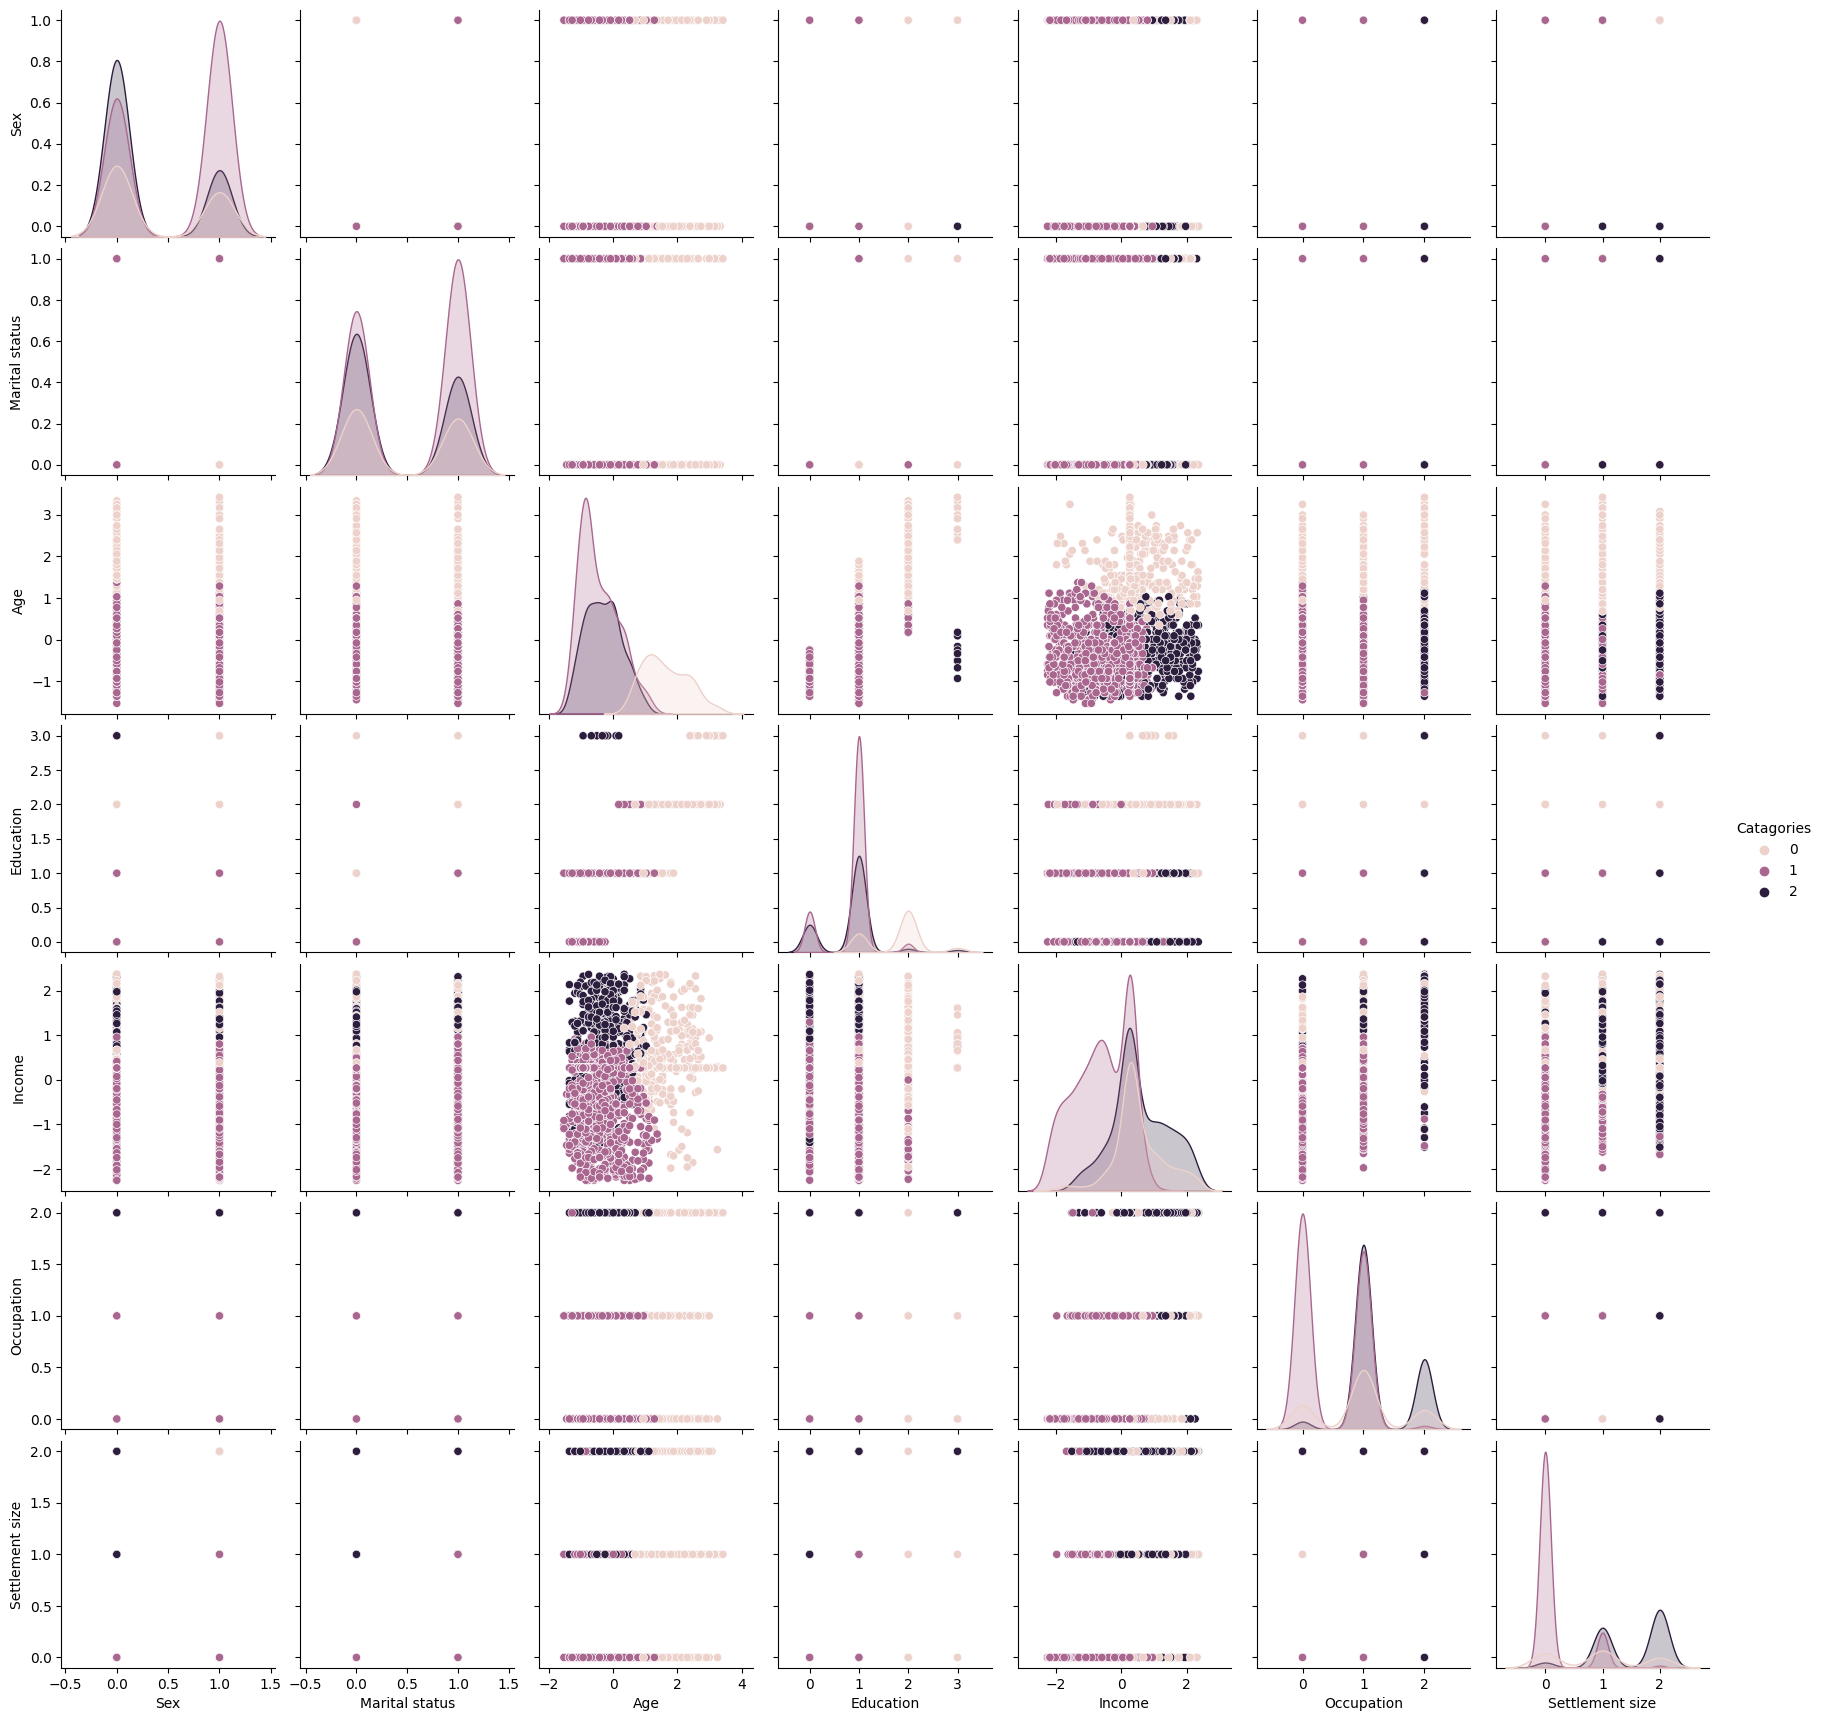

In [119]:
clusters = 3
kmeans = KMeans(n_clusters=clusters).fit(standard_df[standard_df.columns[2:]])

# create standard_df_1 datasets from standard_df and catagories 
standard_df_1 = pd.concat([standard_df,pd.DataFrame(kmeans.labels_,columns=["Catagories"])],axis=1)

#graph 
sns.pairplot(standard_df_1[standard_df_1.columns[1:]],hue="Catagories")


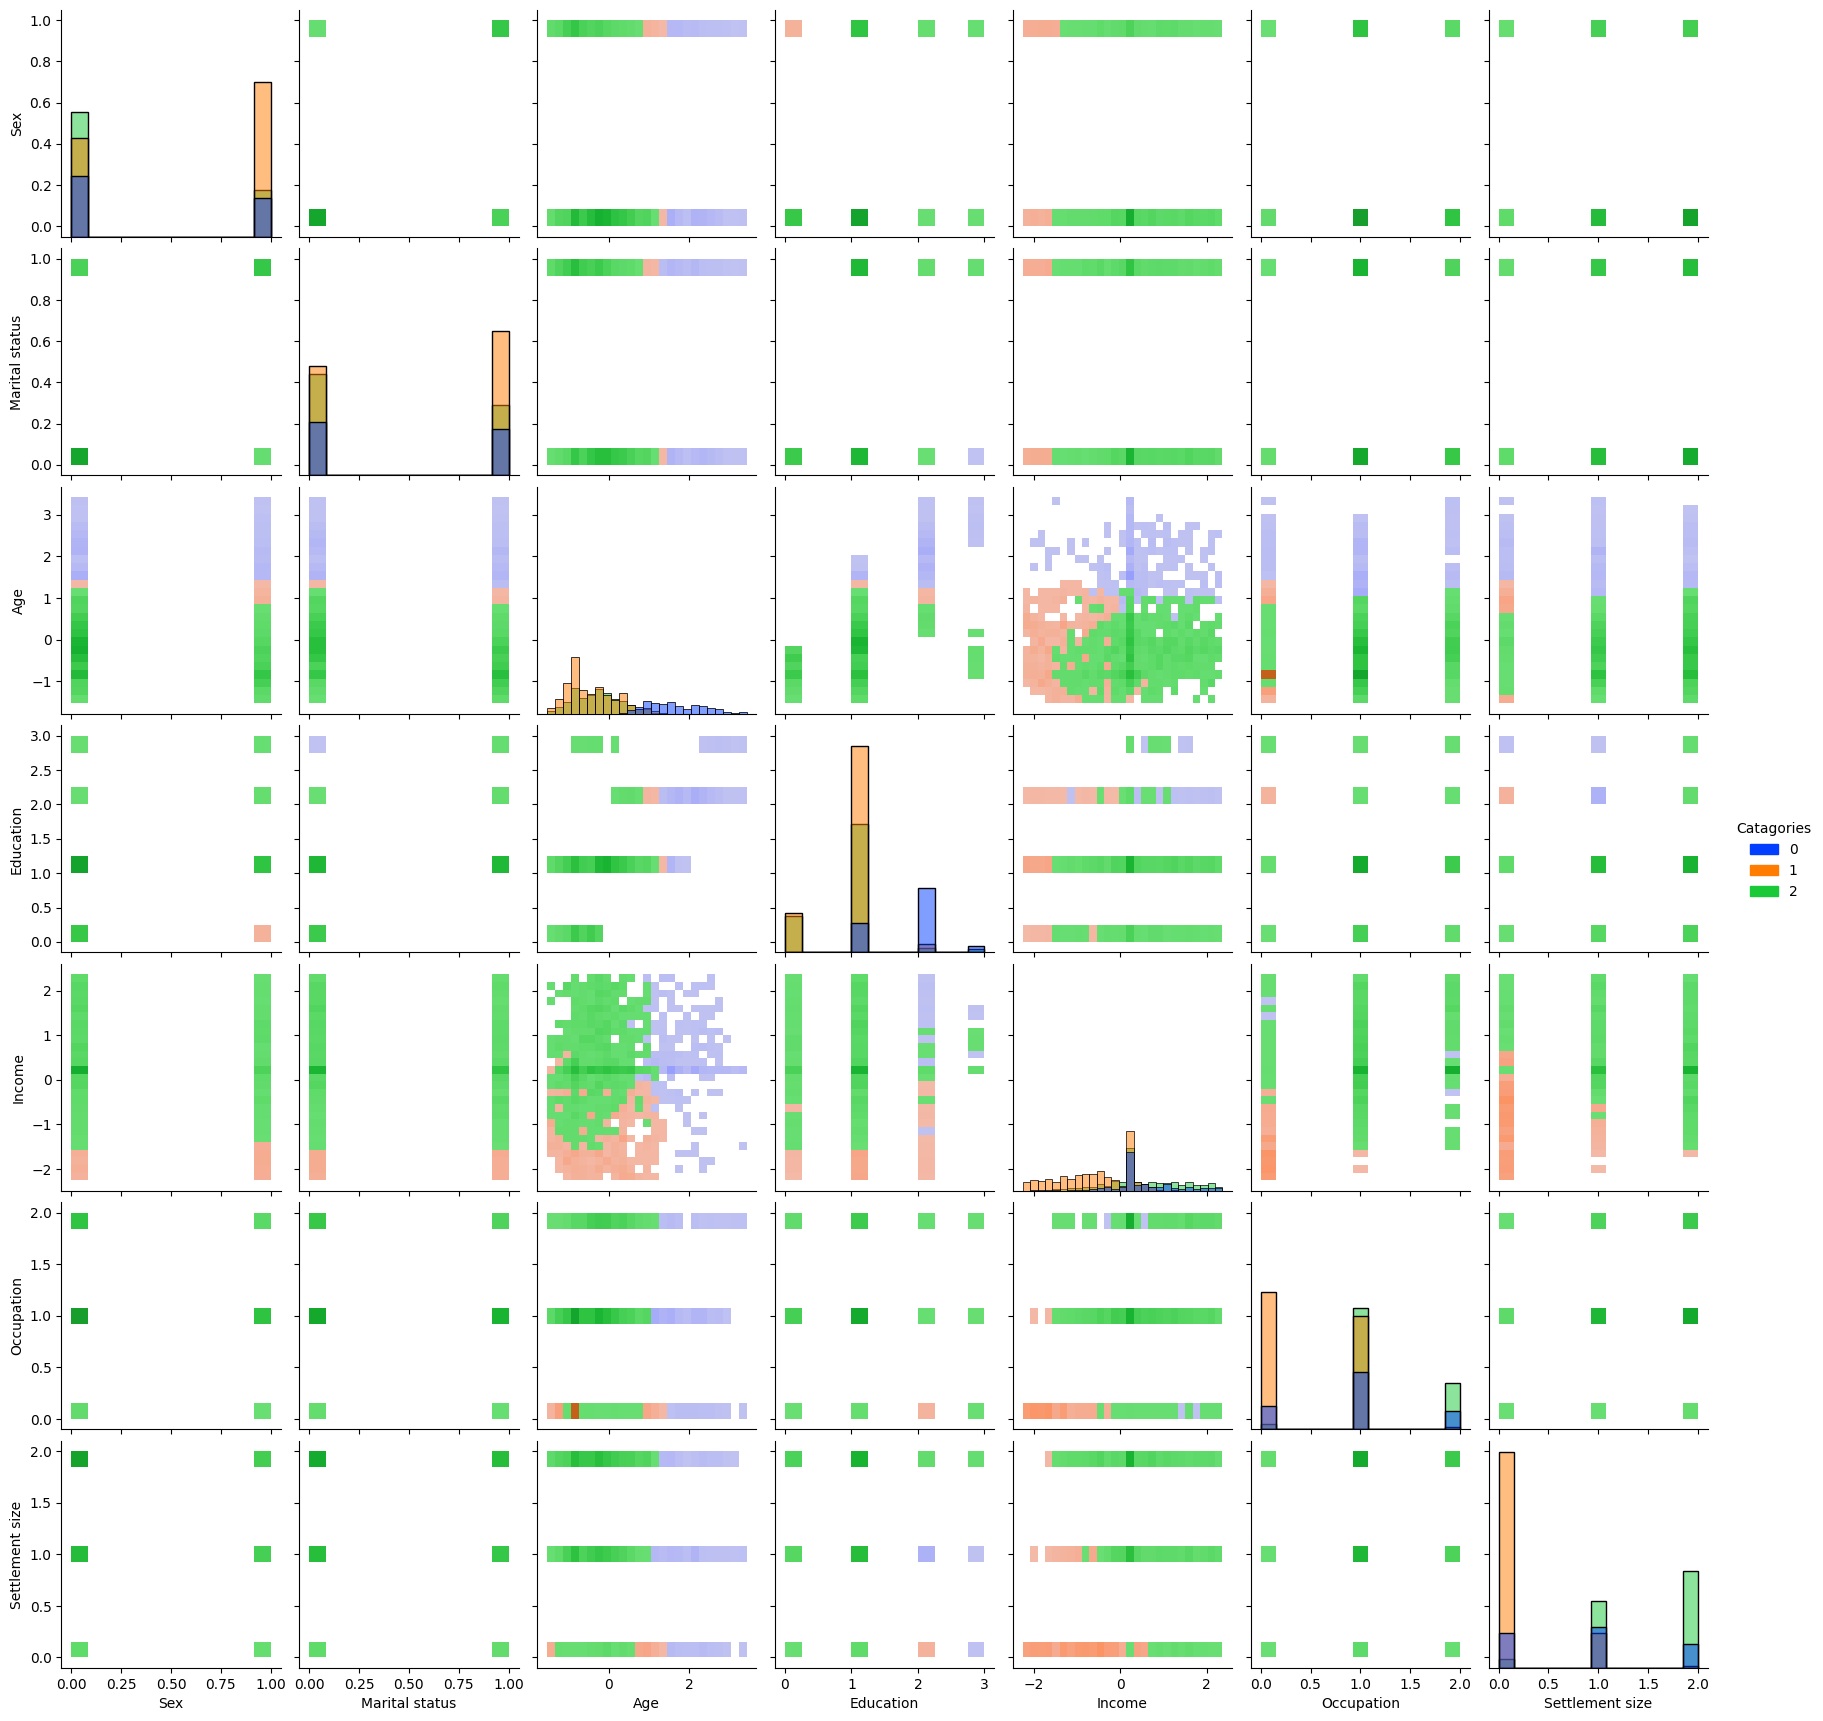

In [120]:
sns.pairplot(data=standard_df_1[standard_df_1.columns[1:]],hue="Catagories",kind="hist",palette="bright")

## Clustring naming

### 0. grup genç yaşda ve düşük-orta gelire sahipken
### 1. grup yaşının genç olmasına rağmen muhtemlen bir uğraşda gelişmiş vasıflı ve yüksek gelirli elamanlar
### 2. grup yaşlı ve genellikle yüksek gelirli tahminimce kıdemli grup.

<Axes: xlabel='Age', ylabel='Income'>

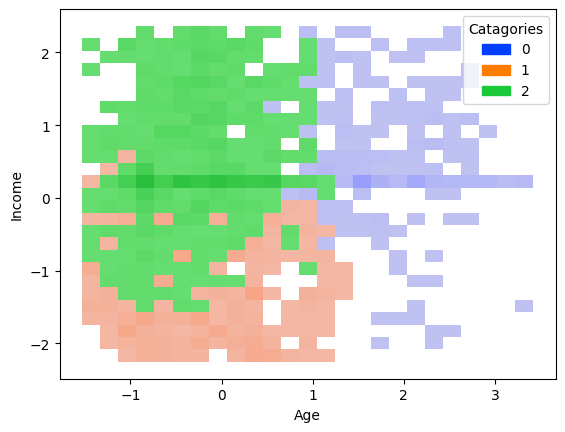

In [121]:
#close view
sns.histplot(x="Age",y="Income",data=standard_df_1,hue="Catagories",palette="bright")

In [122]:
clusters_list = []

for i in range(0,clusters):
    clusters_list.append(i)

younger_unskilled_index= int(standard_df_1.sort_values(by="Income").iloc[0]["Catagories"])
older_skilled_index = int(standard_df_1.sort_values(by="Age").iloc[-1]["Catagories"])
clusters_list.remove(younger_unskilled_index)
clusters_list.remove(older_skilled_index)
younger_skilled_index = clusters_list[0]
younger_unskilled_index,older_skilled_index,younger_skilled_index

(1, 0, 2)

In [123]:
def change_catagory_name(x):
    if x == younger_skilled_index:
        return "Genç ve zengin"
    elif x == younger_unskilled_index:
        return "Genç ve fakir"
    elif x== older_skilled_index:
        return "Yaşlı ama kıdemli"


    


In [124]:
standard_df_1["Catagories_named"] =standard_df_1["Catagories"].apply(change_catagory_name)

In [125]:
standard_df_1

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Catagories,Catagories_named
0,100000001,0,0,2.653614,2,0.445806,1,2,0,Yaşlı ama kıdemli
1,100000002,1,1,-1.187132,1,1.939479,1,2,2,Genç ve zengin
2,100000003,0,0,1.117316,1,-1.583296,0,0,1,Genç ve fakir
3,100000004,0,0,0.775916,1,0.265448,1,1,0,Yaşlı ama kıdemli
4,100000005,0,0,1.458716,1,1.839797,1,1,0,Yaşlı ama kıdemli
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,0.946616,1,0.380286,0,0,0,Yaşlı ama kıdemli
1996,100001997,1,1,-0.760382,1,0.049484,1,0,1,Genç ve fakir
1997,100001998,0,0,-0.418983,0,-1.744090,0,0,1,Genç ve fakir
1998,100001999,1,1,-1.016432,1,-1.082143,0,0,1,Genç ve fakir


In [126]:
standard_df_1.groupby("Catagories_named").count()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Catagories
Catagories_named,,,,,,,,,
Genç ve fakir,966,966,966,966,966,966,966,966,966
Genç ve zengin,655,655,655,655,655,655,655,655,655
Yaşlı ama kıdemli,379,379,379,379,379,379,379,379,379


## Catagory prediction 

In [127]:
import numpy as np
from sklearn.model_selection import KFold

In [128]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
  params = np.random.uniform(param_range[0],param_range[1],10)
  params = np.array([int(i) for i in params])
  params = np.sort(params)
  # Reference link : https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f
  kf = KFold(n_splits=folds)

  x_train = pd.DataFrame(x_train)
  y_train = pd.DataFrame(y_train)

  TRAIN_SCORES = []
  TEST_SCORES  = [] 
  for p in params:

    training_scores = []
    crossval_scores = []
    classifier.n_neighbors = int(p)

    for i in range(folds):
      result = next(kf.split(x_train),None)
      x_training = x_train.iloc[result[0]]
      x_cv = x_train.iloc[result[1]]

      y_training = y_train.iloc[result[0]]
      y_cv = y_train.iloc[result[1]]
      
      model = classifier.fit(x_training,y_training)
      training_scores.append(model.score(x_training,y_training))
      crossval_scores.append(model.score(x_cv,y_cv))
    TRAIN_SCORES.append(np.mean(training_scores))
    TEST_SCORES.append(np.mean(crossval_scores))
  return(TRAIN_SCORES , TEST_SCORES)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_df_1[standard_df_1.columns[:-2]],standard_df_1[standard_df_1.columns[-1]],random_state=42)
classifier = KNeighborsClassifier()
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train_score , cv_scores = RandomSearchCV(X_train,y_train,classifier,(1,21),8)

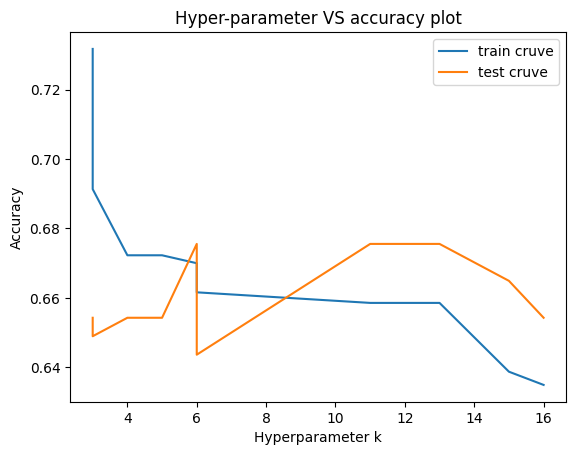

In [130]:
import matplotlib.pyplot as plt
params = np.random.uniform(1,21,10)
params = np.array([int(i) for i in params])
params = np.sort(params)
#params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(params,train_score, label='train cruve')
plt.plot(params,cv_scores, label='test cruve')
plt.xlabel("Hyperparameter k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

## Summery
### Here we see k-means clustring method not good for this station

# 7- Hierarchical Clustering

## Dendogram method

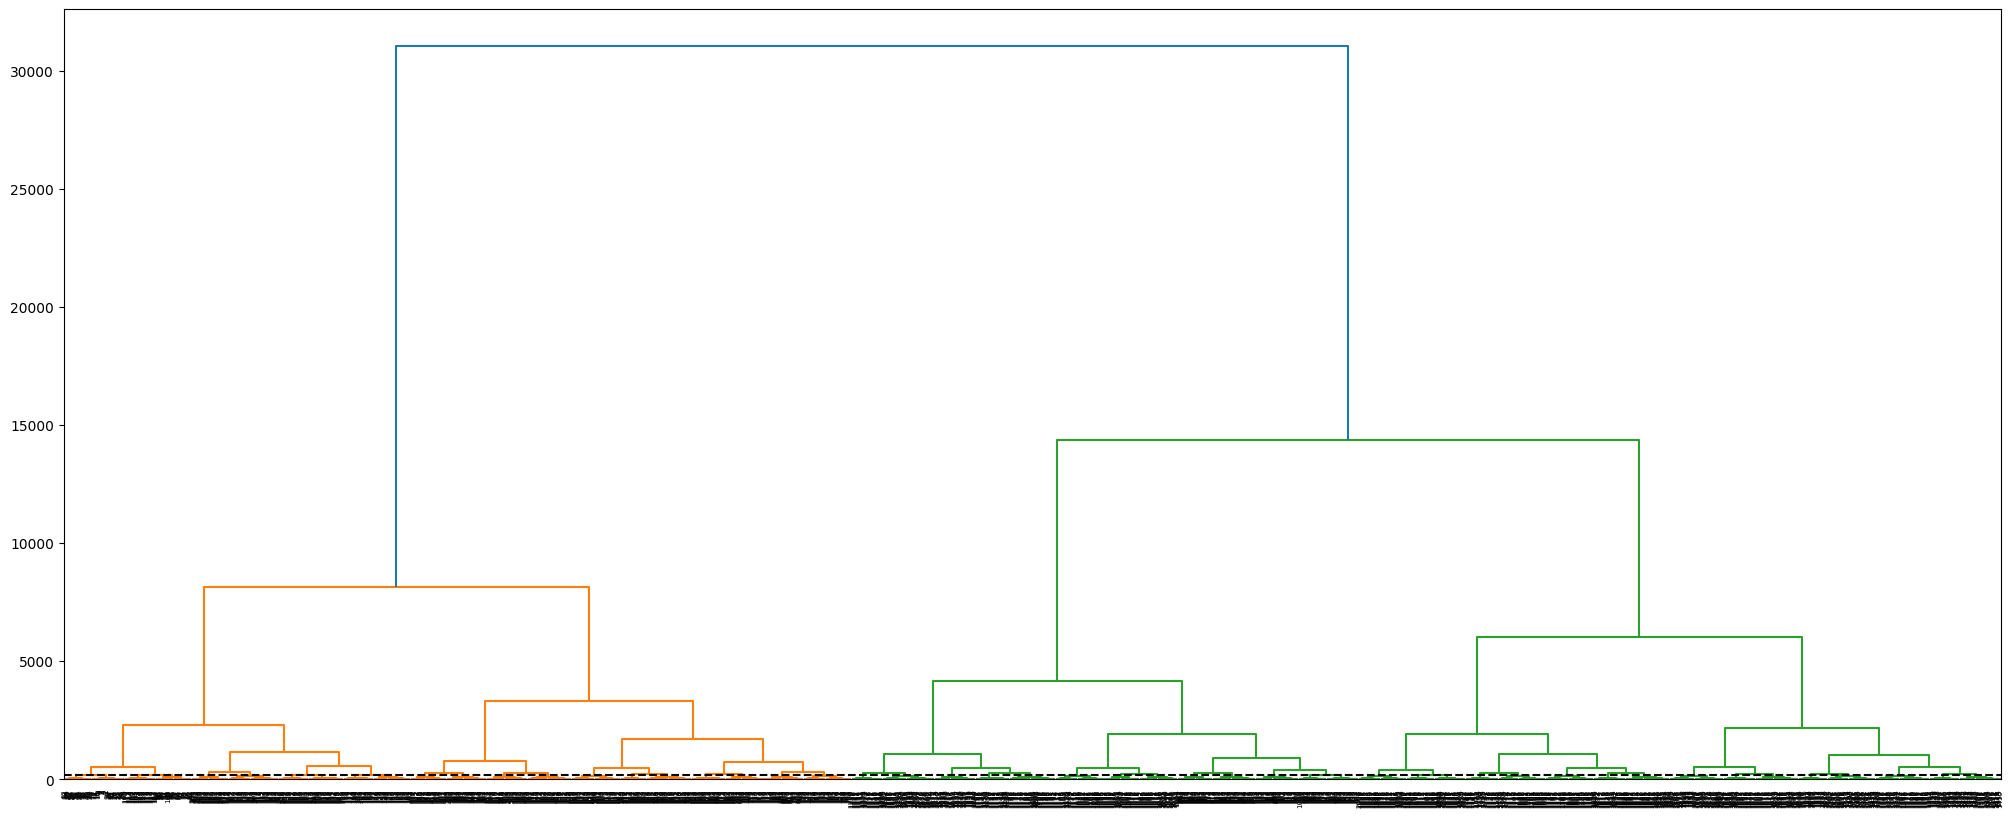

In [131]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
labels = range(1, 2001)

linked = linkage(standard_df, 'ward')

plt.figure(figsize=(25, 10))
dendrogram(linked,
            orientation='top',
            labels=labels,
            show_leaf_counts=True)
plt.axhline(200, ls="--", c="k")
plt.show()

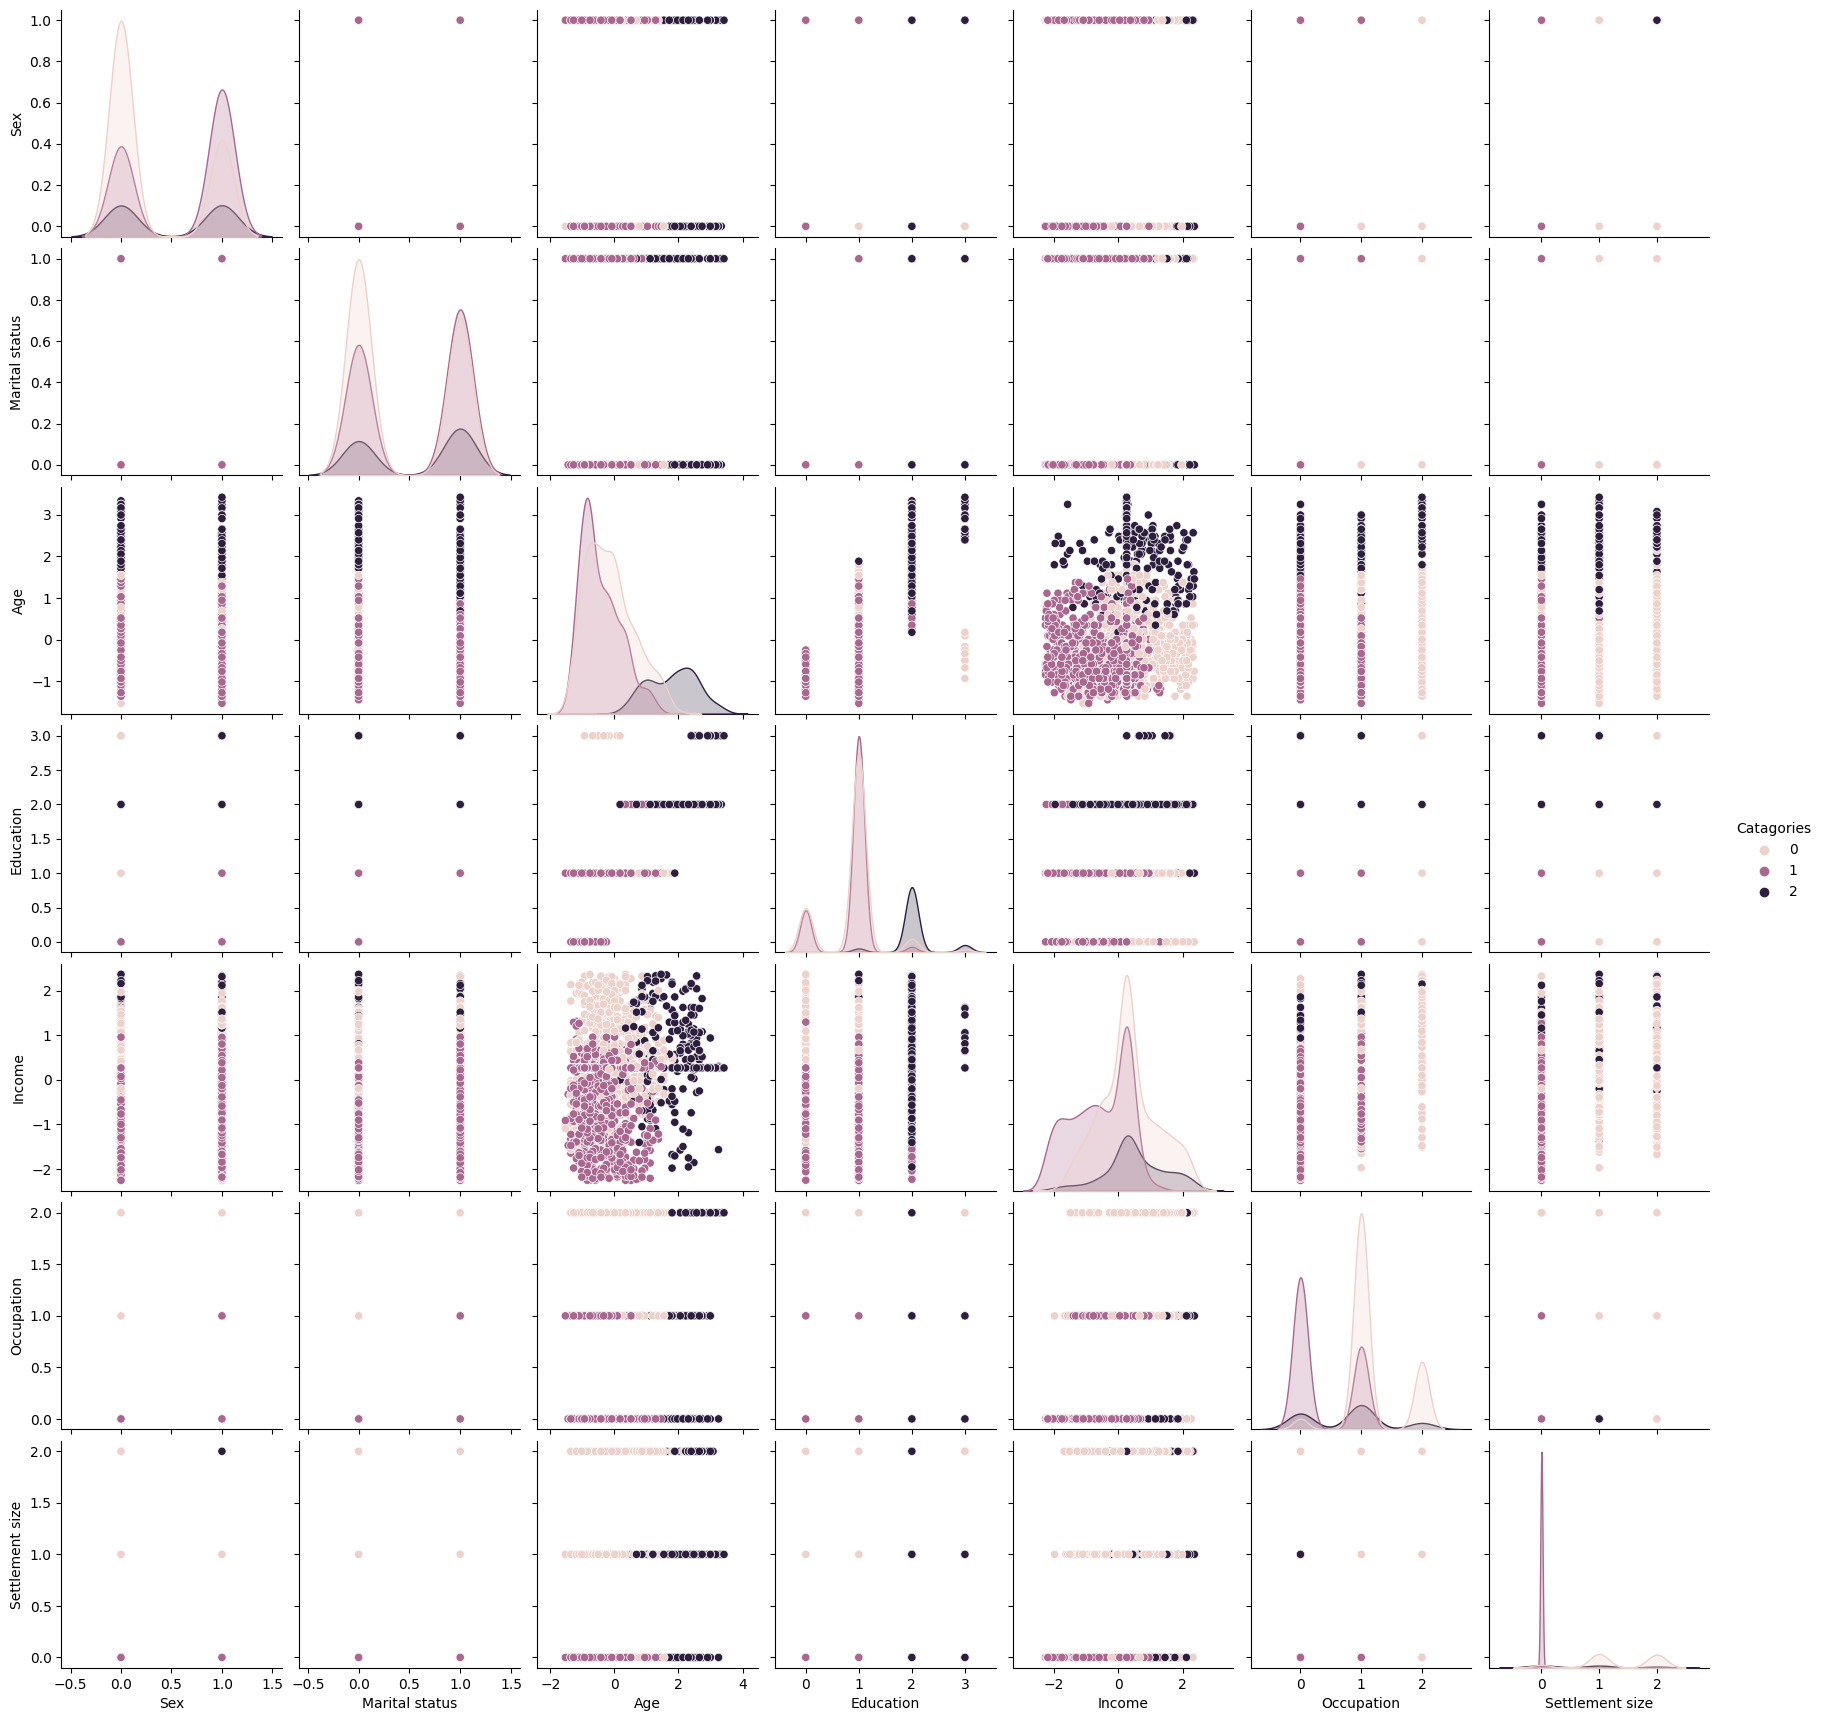

In [132]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(standard_df[standard_df.columns[2:]])

# create standard_df_1 datasets from standard_df and catagories 
standard_df_1 = pd.concat([standard_df,pd.DataFrame(labels,columns=["Catagories"])],axis=1)

#graph 
sns.pairplot(standard_df_1[standard_df_1.columns[1:]],hue="Catagories")


In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(standard_df_1[standard_df_1.columns[:-1]],standard_df_1[standard_df_1.columns[-1]],random_state=42)
classifier = KNeighborsClassifier()
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
train_score , cv_scores = RandomSearchCV(X_train,y_train,classifier,(1,21),8)

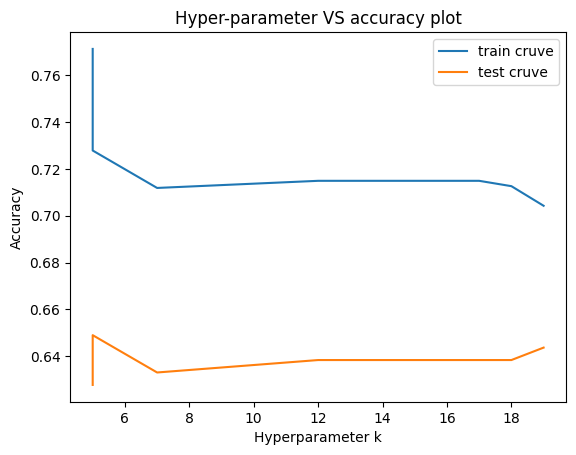

In [134]:
import matplotlib.pyplot as plt
params = np.random.uniform(1,21,10)
params = np.array([int(i) for i in params])
params = np.sort(params)
#params = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(params,train_score, label='train cruve')
plt.plot(params,cv_scores, label='test cruve')
plt.xlabel("Hyperparameter k")
plt.ylabel("Accuracy")
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

## Summery
### Little be gooder than k-means

# 9- Classification

In [138]:
classifier.n_neighbors = int(8)
model = classifier.fit(X_train,y_train)
model.predict(will_classification)

array([0, 1, 0])

In [139]:
will_classification = pd.read_csv("/kaggle/input/classification/classification.csv")
will_classification
model.predict(will_classification)
pred =[]
for i in model.predict(will_classification):
    pred.append( change_catagory_name(i))
pred

pred_df = pd.concat([will_classification,pd.DataFrame(pred,columns= ["Pred"])],axis=1)
pred_df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Pred
0,100002004,0,0,54,2,177980,1,2,Yaşlı ama kıdemli
1,100002005,1,0,49,1,27990,0,0,Genç ve fakir
2,100002006,0,0,70,2,134560,1,2,Yaşlı ama kıdemli


# 10- Income prediction with Linear regression

In [140]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [142]:
df_reg_arg = df[df.columns[1:]].drop("Income",axis=1)
df_reg_arg

,Sex,Marital status,Age,Education,Occupation,Settlement size
0,0,0,67,2,1,2
1,1,1,22,1,1,2
2,0,0,49,1,0,0
3,0,0,45,1,1,1
4,0,0,53,1,1,1
...,...,...,...,...,...,...
1995,1,0,47,1,0,0
1996,1,1,27,1,1,0
1997,0,0,31,0,0,0
1998,1,1,24,1,0,0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_reg_arg,df_income,random_state=42)
X_train, X_test, y_train, y_test

(      Sex  Marital status  Age  Education  Occupation  Settlement size
 1738    1               1   26          1           0                0
 548     1               1   24          1           0                0
 936     1               1   28          1           0                0
 1389    1               1   32          1           1                0
 1607    1               0   38          1           0                0
 ...   ...             ...  ...        ...         ...              ...
 1130    0               1   36          1           2                1
 1294    0               0   29          1           0                1
 860     0               0   27          0           1                1
 1459    1               0   52          2           0                0
 1126    0               0   42          1           1                2
 
 [1500 rows x 6 columns],
       Sex  Marital status  Age  Education  Occupation  Settlement size
 1860    1               1   43     

In [148]:
model = reg.fit(X=X_train,y=y_train)

In [149]:
model.predict(X_test)

array([110350.93215938, 118919.40585172, 110355.16515684, 127555.32242179,
       134360.07474284, 123023.25699746, 121473.83359553, 114778.40179362,
       123173.96342642, 112794.91699091, 135210.13965828, 122607.25348279,
       118553.90972179, 129935.71571292, 135560.93750782, 120052.82573899,
       115586.58906765, 130109.75016559, 109545.36375808, 106707.58104246,
       113646.10429949, 115672.96322322, 112228.20704728, 128235.58588202,
       105817.25261032, 130676.46010923, 113929.4592713 , 104859.48130046,
       113820.63048377, 122653.36412167, 119773.70376463, 117332.82953743,
       120622.64628695, 113820.63048377, 131310.61293058, 130388.87213995,
       110067.57718756, 121715.31092592, 125117.18471245, 117785.98596446,
       120078.39097528, 108695.29884263, 109788.4552132 , 118094.90617257,
       113928.33687818, 126990.22660289, 130109.75016559, 117548.74163153,
       117570.07387036, 111137.78719457, 120166.37925559, 116131.96677244,
       114495.04682181, 1

# 11- MSE 

In [152]:
from sklearn.model_selection import cross_val_score

In [156]:
np.mean(-cross_val_score(model,X_train,y_train,cv = 10,scoring= "neg_mean_squared_error"))

242631075.51947442